In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

import solt
import solt.transforms as slt


In [2]:
def vis_img(img):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


In [3]:
img = cv2.imread('data/voc.jpg')
h, w, c = img.shape
img = img[:w]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

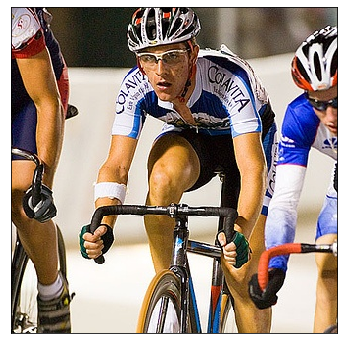

In [4]:
vis_img(img)

In [5]:
stream = solt.Stream([
    slt.Rotate(angle_range=(-90, 90), p=1, padding='r'),
    slt.Flip(axis=1, p=0.5),
    slt.Flip(axis=0, p=0.5),
    slt.Shear(range_x=0.3, range_y=0.8, p=0.5, padding='r'),
    slt.Scale(range_x=(0.8, 1.3), padding='r', range_y=(0.8, 1.3), same=False, p=0.5),
    slt.Pad((w, h), 'r'),
    slt.Crop((w, w), 'r'),
    slt.CvtColor('rgb2gs', keep_dim=True, p=0.2),
    slt.HSV((0, 10), (0, 10), (0, 10)),
    slt.Blur(k_size=7, blur_type='m'),
    solt.SelectiveStream([
        slt.CutOut(40, p=1),
        slt.CutOut(50, p=1),
        slt.CutOut(10, p=1),
        solt.Stream(),
        solt.Stream(),
    ], n=3),
], ignore_fast_mode=True)

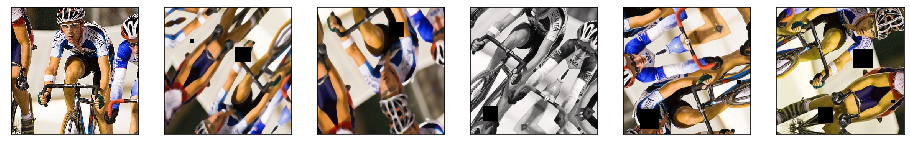

In [6]:
fig = plt.figure(figsize=(16,16))
n_augs = 6


random.seed(42)
for i in range(n_augs):
    img_aug = stream({'image': img}, return_torch=False, ).data[0].squeeze()

    ax = fig.add_subplot(1,n_augs,i+1)
    if i == 0:
        ax.imshow(img)
    else:
        ax.imshow(img_aug)
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('results/img_aug.png', bbox_inches='tight')
plt.show()